In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/drive/My Drive/PKM AI/Data"

classes = os.listdir(dir_example)
print(classes)

dir_example = "/content/drive/My Drive/PKM AI/Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['README.md', 'Train', 'Test']
['metal', 'glass', 'cardboard', 'plastic', 'trash', 'paper']


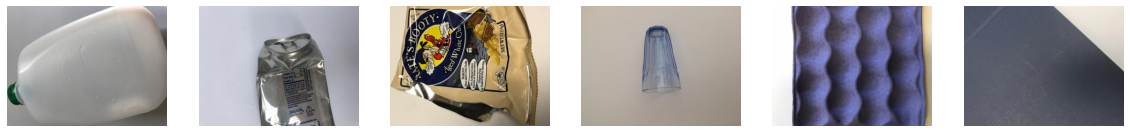

In [ ]:
dir_with_examples = '/content/drive/My Drive/PKM AI/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [ ]:
train = '/content/drive/My Drive/PKM AI/Data/Train'
test = '/content/drive/My Drive/PKM AI/Data/Test'

train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

Found 2184 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


((32, 300, 300, 3), (32,))

In [ ]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [ ]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

model.save('/content/drive/My Drive/PKM AI/Model')

Epoch 1/10
68/68 [==============================] - 472s 7s/step - loss: 1.7222 - accuracy: 0.2435
Epoch 2/10
68/68 [==============================] - 333s 5s/step - loss: 1.4982 - accuracy: 0.3810
Epoch 3/10
68/68 [==============================] - 323s 5s/step - loss: 1.4055 - accuracy: 0.4252
Epoch 4/10
68/68 [==============================] - 324s 5s/step - loss: 1.3490 - accuracy: 0.4531
Epoch 5/10
68/68 [==============================] - 324s 5s/step - loss: 1.2278 - accuracy: 0.5125
Epoch 6/10
68/68 [==============================] - 328s 5s/step - loss: 1.1061 - accuracy: 0.5730
Epoch 7/10
68/68 [==============================] - 326s 5s/step - loss: 0.9461 - accuracy: 0.6478
Epoch 8/10
68/68 [==============================] - 327s 5s/step - loss: 0.8659 - accuracy: 0.6599
Epoch 9/10
68/68 [==============================] - 331s 5s/step - loss: 0.7241 - accuracy: 0.7361
Epoch 10/10
68/68 [==============================] - 328s 5s/step - loss: 0.6384 - accuracy: 0.7695


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/PKM AI/Model')

1/1 [==============================] - 1s 635ms/step
Probability: 0.9487181
Classified: cardboard 

CARDBOARD : 94.87 %
GLASS : 0.44 %
METAL : 0.56 %
PAPER : 0.04 %
PLASTIC : 0.53 %
TRASH : 3.57 %


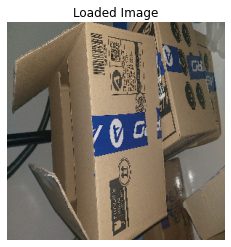

In [ ]:
import keras.utils as ku
import numpy as np

test_img = '/content/drive/My Drive/PKM AI/Data/Test/20221222_172449.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0],axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

Text(0.5, 1.0, 'Result Probability')

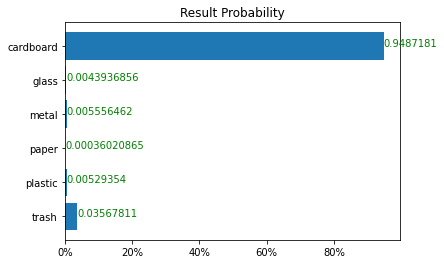

In [ ]:
import matplotlib.ticker as mtick
newlabels = (train_generator.class_indices)
classes = list(newlabels)
probability = list(prediction[0])
plt.barh(classes,prediction[0])
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
# plt.sort_values(prediction[0], inplace=true)
for i, v in enumerate(prediction[0]):
  plt.text(v, i, str(v), color = 'green', fontweight = 'light')
plt.title('Result Probability')